In [1]:
import os
import scipy.io as sio 

solution_dir = "../real_world/mat_files/"
solution_names = sorted(os.listdir(solution_dir), key=lambda x: int(x.split('_')[-1].split('.')[0]) )

def get_optimal_solutions():
    all = []

    for file in solution_names:
        mat = sio.loadmat(os.path.join(solution_dir, file))
        data = (mat["id"][0][0], mat["n"][0][0], mat["gamma"][0][0])
        all.append(data)
    return all

optimals = get_optimal_solutions()

Avg GCN Residual:	0.43412939946132784
Avg Greedy Residual:	0.5177218431960265


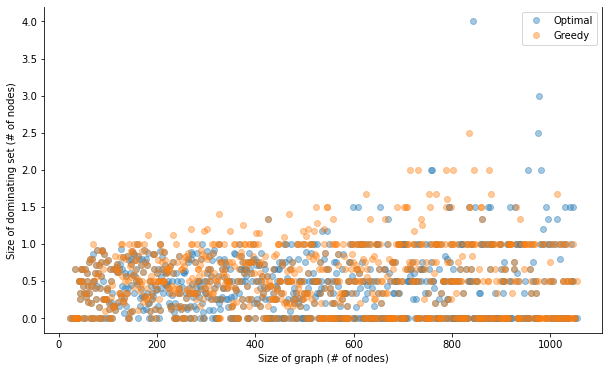

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import json
from collections import defaultdict
from statistics import mean

data = None

test_real_world_mode = True

greedy_combo_flag = False
plot_num = 2

if not greedy_combo_flag:
    files = ['./FINAL-greedy-results.json', './FINAL-extend-results.json', './UPDATED-real-world-results.json']
    output_file = 'FINAL-greedy-performance.png' if plot_num == 0 else 'FINAL-greedy-performance-extend.png' if plot_num == 1 else 'FINAL-real-world-performance.png'

else:
    files = ['./COMBO-greedy-results.json', './COMBO-greedy-extend-results.json']
    output_file = 'COMBO-greedy-small.png' if plot_num == 0 else 'COMBO-greedy-extend.png'

with open(files[plot_num], 'r') as f:
    data = json.load(f)

gamma = defaultdict(list)
best = defaultdict(list)
median = defaultdict(list)
old_greedy = defaultdict(list)
greedy = defaultdict(list)
pruned_greedy = defaultdict(list)
random = defaultdict(list)
combo = {
    "0.7": defaultdict(list),
    "0.75": defaultdict(list),
    "0.8": defaultdict(list),
    "0.85": defaultdict(list),
    "0.86": defaultdict(list),
    "0.87": defaultdict(list),
    "0.88": defaultdict(list),
    "0.89": defaultdict(list),
    "0.9": defaultdict(list),
    "0.91": defaultdict(list),
    "0.92": defaultdict(list),
    "0.93": defaultdict(list),
    "0.94": defaultdict(list),
    "0.95": defaultdict(list),
    "0.96": defaultdict(list),
    "0.97": defaultdict(list),
    "0.98": defaultdict(list),
    "0.99": defaultdict(list),
    "1.0": defaultdict(list),
}
greedy_combo = {
    "0.7": defaultdict(list),
    "0.75": defaultdict(list),
    "0.8": defaultdict(list),
    "0.85": defaultdict(list),
    "0.86": defaultdict(list),
    "0.87": defaultdict(list),
    "0.88": defaultdict(list),
    "0.89": defaultdict(list),
    "0.9": defaultdict(list),
    "0.91": defaultdict(list),
    "0.92": defaultdict(list),
    "0.93": defaultdict(list),
    "0.94": defaultdict(list),
    "0.95": defaultdict(list),
    "0.96": defaultdict(list),
    "0.97": defaultdict(list),
    "0.98": defaultdict(list),
    "0.99": defaultdict(list),
    "1.0": defaultdict(list),
}

for idx, graph in enumerate(data):

    if plot_num != 2:
        proc = graph.split('_')
        nodes = int(proc[0]) if plot_num == 1 else int(proc[1][1:])
        if nodes == 250:
            continue
    else:
        nodes = data[graph]["size"]
        if(nodes != optimals[idx][1]):
            print(f"Failed on idx {idx} with graph of size {nodes} but optimals from graph of size {optimals[idx][1]}")
            exit(-1)
        


    if plot_num == 0:
        gamma[nodes].append(data[graph]["gamma"])
    elif plot_num == 2:
        gamma[nodes].append(optimals[idx][2])

    best[nodes].append(data[graph]["best"])
    median[nodes].append(data[graph]["median"])
    greedy[nodes].append(data[graph]["greedy"])
    pruned_greedy[nodes].append(data[graph]["pruned_greedy"])
    random[nodes].append(data[graph]["random"])
    if plot_num != 2:
        for p in combo:
            combo[p][nodes].append(data[graph]["combo"][p])

    if greedy_combo_flag:
        for p in greedy_combo:
            greedy_combo[p][nodes].append(data[graph]["greedy_combo"][p])
        
    # medianCombo[nodes].append(data[graph]["medianCombo"])



for size in best:
    if plot_num in [0, 2]:
        gamma[size] = mean(gamma[size])
    best[size] = mean(best[size])
    median[size] = mean(median[size])
    greedy[size] = mean(greedy[size])
    pruned_greedy[size] = mean(pruned_greedy[size])
    random[size] = mean(random[size])
    if plot_num != 2:
        for p in combo:
            combo[p][size] = mean(combo[p][size])
    if greedy_combo_flag:
        for p in greedy_combo:
            greedy_combo[p][size] = mean(greedy_combo[p][size])
    #medianCombo[size] = mean(medianCombo[size])


if plot_num in [0, 2]:
    gamma_graph = sorted(list(gamma.items()))

best_graph = sorted(list(best.items()))
median_graph = sorted(list(median.items()))
greedy_graph = sorted(list(greedy.items()))
pruned_greedy_graph = sorted(list(pruned_greedy.items()))
random_graph = sorted(list(random.items()))
combo_graph = {}
if plot_num != 2:
    for p in combo:
        combo_graph[p] = sorted(list(combo[p].items()))

greedy_combo_graph = {}
if greedy_combo_flag:
    for p in greedy_combo:
        greedy_combo_graph[p] = sorted(list(greedy_combo[p].items()))
# median_combo_graph = sorted(list(medianCombo.items()))


fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.spines['top'].set_visible(False)


if test_real_world_mode:
    sizes = []
    new_gcn_graph = []
    new_greedy_graph = []
    for op, gcn, gr in zip(gamma_graph, best_graph, pruned_greedy_graph):
        assert(op[0] == gcn[0] == gr[0])
        sizes.append(op[0])
        new_gcn_graph.append(float(gcn[1]-op[1]))
        new_greedy_graph.append(float(gr[1]-op[1]))

    print(f"Avg GCN Residual:\t{mean(new_gcn_graph)}")
    print(f"Avg Greedy Residual:\t{mean(new_greedy_graph)}")
    plt.plot(sizes, new_gcn_graph, label="Optimal", linestyle="",marker="o", alpha=0.4)
    plt.plot(sizes, new_greedy_graph, label="Greedy", linestyle="",marker="o", alpha=0.4)

    plt.xlabel('Size of graph (# of nodes)')
    plt.ylabel('Size of dominating set (# of nodes)')
    plt.legend()

    plt.savefig(output_file, dpi=500)
    plt.show()
    exit(1)

# if plot_num in [0, 2]:
#     plt.plot([x[0] for x in gamma_graph], [x[1] for x in gamma_graph], label="Optimal")

# if not greedy_combo_flag:
#     plt.plot([x[0] for x in best_graph], [x[1] for x in best_graph], label = "Best GCN")
#     # plt.plot([x[0] for x in median_graph], [x[1] for x in median_graph], label="Median GC")
#     # plt.plot([x[0] for x in greedy_graph], [x[1] for x in greedy_graph], label="(New) Greedy")
#     plt.plot([x[0] for x in pruned_greedy_graph], [x[1] for x in pruned_greedy_graph], label="Pruned (New) Greedy")
#     # plt.plot([x[0] for x in random_graph], [x[1] for x in random_graph], label = "Random")

# i = 2
# probs = ["0.7", "0.8", "0.9", "0.95", "1.0"]
# probs = probs[i:i+1]

# if plot_num != 2:
#     for p in probs:
#         plt.plot([x[0] for x in combo_graph[p]], [x[1] for x in combo_graph[p]], label = f"{100*float(p)}% Random")

# if greedy_combo_flag:
#     for p in probs:
#         plt.plot([x[0] for x in greedy_combo_graph[p]], [x[1] for x in greedy_combo_graph[p]], label = f"{100*float(p)}% Greedy")
# # plt.plot([x[0] for x in median_combo_graph], [x[1] for x in median_combo_graph], label = "Median Combination (50-50)")


# plt.xlabel('Size of graph (# of nodes)')
# plt.ylabel('Size of dominating set (# of nodes)')
# plt.legend()

# plt.savefig(output_file, dpi=500)
# plt.show()

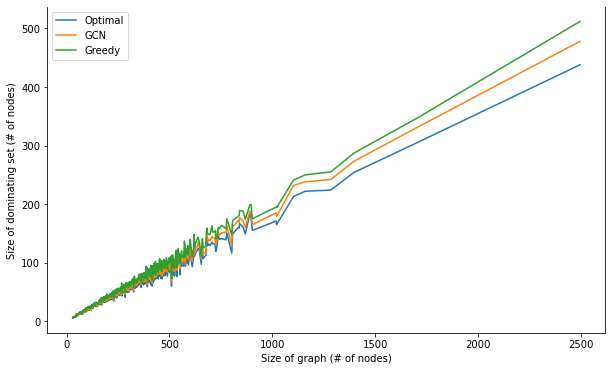

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import json
from collections import defaultdict
from statistics import mean

data = "real-world-results-DD.json"
output_file = "real-world-results-DD.png"

with open(data, 'r') as f:
    data = json.load(f)

gamma = defaultdict(list)
best = defaultdict(list)
pruned_greedy = defaultdict(list)

for idx, graph in enumerate(data):
    nodes = data[graph]["size"]
        
    gamma[nodes].append(data[graph]["gamma"])
    best[nodes].append(data[graph]["best"])
    pruned_greedy[nodes].append(data[graph]["pruned_greedy"])
    

for size in best:
    gamma[size] = mean(gamma[size])
    best[size] = mean(best[size])
    pruned_greedy[size] = mean(pruned_greedy[size])


gamma_graph = sorted(list(gamma.items()))
best_graph = sorted(list(best.items()))
pruned_greedy_graph = sorted(list(pruned_greedy.items()))

fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.spines['top'].set_visible(False)


plt.plot([x[0] for x in gamma_graph], [x[1] for x in gamma_graph], label="Optimal")
plt.plot([x[0] for x in best_graph], [x[1] for x in best_graph], label = "GCN")
plt.plot([x[0] for x in pruned_greedy_graph], [x[1] for x in pruned_greedy_graph], label="Greedy")

plt.xlabel('Size of graph (# of nodes)')
plt.ylabel('Size of dominating set (# of nodes)')
plt.legend()

plt.savefig(output_file, dpi=500)
plt.show()

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import json

with open('./FINAL_RUN/training_data.json', 'r') as f:
    graph_data = json.load(f)

loss = graph_data['Loss']
accuracy = graph_data['Accuracy']

assert(len(loss) == len(accuracy))

col1 = 'royalblue'
col2 = 'orangered'

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(range(1, len(loss) + 1), loss, col1)
ax2.plot(range(1, len(accuracy) + 1), accuracy, col2)

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color=col1)
ax2.set_ylabel('Accuracy', color=col2)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_color(col1)
ax2.spines['right'].set_color(col2)

ax1.tick_params(axis='y', colors=col1)
ax2.tick_params(axis='y', colors=col2)


plt.savefig('loss-accuracy.png', dpi=500)
plt.show()


<Figure size 1000x600 with 2 Axes>

In [20]:
import scipy.io as sio

optimal = []
gcn = []
greedy = []

files = ['./final-results.json', './final-extend-results.json']
plot_num = 0

with open(files[plot_num], 'r') as f:
    data = json.load(f)

for graph in data:
    gcn.append(data[graph]['runtime'])
    greedy.append(data[graph]['greedy_time'])

    if plot_num == 0:
        mat_contents = sio.loadmat(f'./test/{graph}')
        op = mat_contents['solution_runtime']
        optimal.append(op[0][0])

if plot_num == 0:  
    print(f'Optimal Avg: {mean(optimal)}')
print(f'GCN Avg: {mean(gcn)}')
print(f'Greedy Avg: {mean(greedy)}')


Optimal Avg: 19085.78420969761
GCN Avg: 2.2635115327288924
Greedy Avg: 0.00011221217689010014


In [44]:
import random
import networkx as nx
import json
import scipy.io as sio
import time

def buildRandomSolution(adj):
    g = nx.from_numpy_matrix(adj)
    randomNodes = list(range(adj.shape[0]))
    random.shuffle(randomNodes)

    min = 0
    max = len(randomNodes) - 1
    while min < max:
        mid = (max + min) // 2
        currSolution = randomNodes[:mid+1]

        if nx.algorithms.dominating.is_dominating_set(g, currSolution):
            max = mid
        else:
            min = mid + 1
    
    currSolution = randomNodes[:min+1]
    assert(min == max)
    assert(nx.algorithms.dominating.is_dominating_set(g,currSolution))

    while True:
        remove = False

        for i in range(len(currSolution) - 1, -1, -1):
            newSolution = currSolution[:i] + currSolution[i+1:]

            if nx.algorithms.dominating.is_dominating_set(g, newSolution):
                remove = True
                currSolution = newSolution
                break

        if not remove:
            break
    
    return sorted(currSolution)

In [47]:
data = None

with open(f'final-results.json', "r") as f:
    data = json.load(f)

testing_path = "./test"

first = 0
second = 0

for record in data:

    mat_contents = sio.loadmat(testing_path + '/' + record)
    adj = mat_contents['adj']

    start = time.time()
    rand_res = len(buildRandomSolution(adj))
    tot = time.time() - start

    data[record]["random"] = rand_res
    data[record]["random_time"] = tot

with open(f'random-updated-final-results.json', "w") as f:
    json.dump(data, f, indent=2)

In [13]:
import networkx as nx
import time

def greedySolution(g):
    start_time = time.time()

    dominatingSet = []
    dominatedNodes = set()

    while not nx.algorithms.dominating.is_dominating_set(g, dominatingSet):

        currNodes = []
        max_white_nodes = 0
        for v in g:
            white_count = 0
            for u in g.neighbors(v):
                if u not in dominatedNodes:
                    white_count += 1
            if v not in dominatedNodes:
                white_count += 1
            
            if white_count == max_white_nodes:
                currNodes.append(v)
            elif white_count > max_white_nodes:
                currNodes = [v]
                max_white_nodes = white_count
        
        print(currNodes)
        print(max_white_nodes)
        
        dominatingSet.extend(currNodes)
        for node in currNodes:
            dominatedNodes.add(node)
            for adj_node in g.neighbors(node):
                dominatedNodes.add(adj_node)
    
    greedySize = len(dominatingSet)

    print(dominatingSet)
    print(dominatedNodes)

In [14]:
g = nx.Graph()
g.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
g.add_edges_from([("A", "B"), ("A", "E"), ("B", "E"), ("B", "F"), ("B", "C"), ("C", "F"), ("D", "E"), ("F", "G")])

greedySolution(g)

['B']
5
['D', 'E', 'F', 'G']
1
['B', 'D', 'E', 'F', 'G']
{'A', 'D', 'B', 'E', 'C', 'F', 'G'}


In [6]:
import json
import os
from statistics import mean

prefix = "real-world-results-"
suffix = ".json"

files = [file for file in os.listdir("./") if file[:len(prefix)] == prefix and file[-len(suffix):] == suffix]

for file in files:
    with open(file, 'r') as f:
        data = json.load(f)

    precision = 4
    
    dataset = file[len(prefix):-len(suffix)]
    dataset = dataset.split("_")

    sizes = [data[graph]["size"] for graph in data]
    optimal = [data[graph]["gamma"] for graph in data]
    gcn = [data[graph]["best"] for graph in data]
    greedy = [data[graph]["pruned_greedy"] for graph in data]
    random = [data[graph]["random"] for graph in data]
    print(f"{dataset} & {round(mean(sizes), precision)} & {round(mean(optimal), precision)} & {round(mean(gcn), precision)} & {round(mean(greedy), precision)} & {round(mean(random), precision)} \\\\ \\midrule")
    # random = [data[graph]["random"] for graph in data]
    # print(f"\tSize:\t\t {mean(sizes)}")
    # print(f"\tOptimal:\t {mean(optimal)}")
    # print(f"\tGCN:\t\t {mean(gcn)}")
    # print(f"\tGreedy:\t\t {mean(greedy)}")
    # print(f"\tRandom:\t\t {mean(random)}")